### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [2]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [3]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickup_counts = df.groupby(df['Date/Time'].dt.date).size()

# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts.idxmax()

pickup_counts, date_with_highest_pickups


(Date/Time
 2014-08-01    10734
 2014-08-02     5788
 2014-08-03      914
 2014-08-04     1145
 2014-08-05     1167
 2014-08-06     1314
 2014-08-07     1400
 2014-08-08     1173
 2014-08-09      923
 2014-08-10      770
 2014-08-11      909
 2014-08-12     1387
 2014-08-13     1180
 2014-08-14     1147
 2014-08-15     1051
 2014-08-16      861
 2014-08-17      823
 2014-08-18      898
 2014-08-19     1024
 2014-08-20     1092
 2014-08-21     1203
 2014-08-22     1032
 2014-08-23      879
 2014-08-24      769
 2014-08-25      777
 2014-08-26      943
 2014-08-27      930
 2014-08-28      959
 2014-08-29      936
 2014-08-30      724
 2014-08-31      738
 dtype: int64,
 datetime.date(2014, 8, 1))

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [4]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_date_df = df[df['Date/Time'].dt.date == date_with_highest_pickups]

# Get the count of pickups on the highest date
pickup_count_on_highest_date = highest_date_df.shape[0]

highest_date_df, pickup_count_on_highest_date



(                Date/Time      Lat      Lon    Base
 0     2014-08-01 00:03:00  40.7366 -73.9906  B02512
 1     2014-08-01 00:09:00  40.7260 -73.9918  B02512
 2     2014-08-01 00:12:00  40.7209 -74.0507  B02512
 3     2014-08-01 00:12:00  40.7387 -73.9856  B02512
 4     2014-08-01 00:12:00  40.7323 -74.0077  B02512
 ...                   ...      ...      ...     ...
 40859 2014-08-01 23:59:00  40.6493 -73.8372  B02598
 40860 2014-08-01 23:59:00  40.7114 -73.9422  B02598
 40861 2014-08-01 23:59:00  40.7511 -73.9813  B02598
 40862 2014-08-01 23:59:00  40.7198 -73.9877  B02598
 40863 2014-08-01 23:59:00  40.7571 -73.9719  B02598
 
 [10734 rows x 4 columns],
 10734)

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [5]:
# Count the number of unique TLC base companies
unique_base_companies_count = df['Base'].nunique()

unique_base_companies_count





2

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [6]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base = df.groupby('Base').size()

# Find the TLC base company with the highest number of pickups
base_with_highest_pickups = pickup_counts_by_base.idxmax()

pickup_counts_by_base, base_with_highest_pickups



(Base
 B02512    31472
 B02598    14117
 dtype: int64,
 'B02512')

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [7]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base = df['Base'].value_counts()

pickup_counts_by_base


Base
B02512    31472
B02598    14117
Name: count, dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [8]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts_by_hour = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickup_counts_by_hour.idxmax()

pickup_counts_by_hour, hour_with_highest_pickups





(Hour
 0     1132
 1      768
 2      510
 3      535
 4      524
 5      737
 6     1254
 7     1813
 8     1840
 9     1794
 10    1834
 11    1952
 12    2042
 13    2230
 14    2595
 15    2993
 16    3313
 17    3292
 18    2794
 19    2692
 20    2553
 21    2611
 22    2302
 23    1480
 dtype: int64,
 16)

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

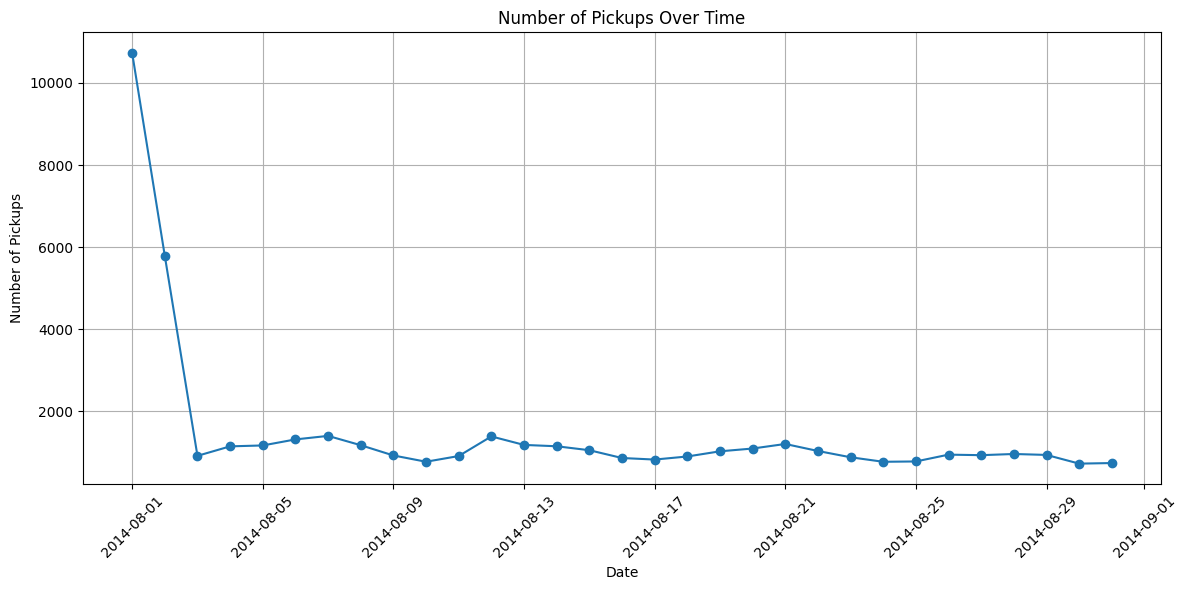

In [9]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(12, 6))
plt.plot(pickup_counts_by_date.index, pickup_counts_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

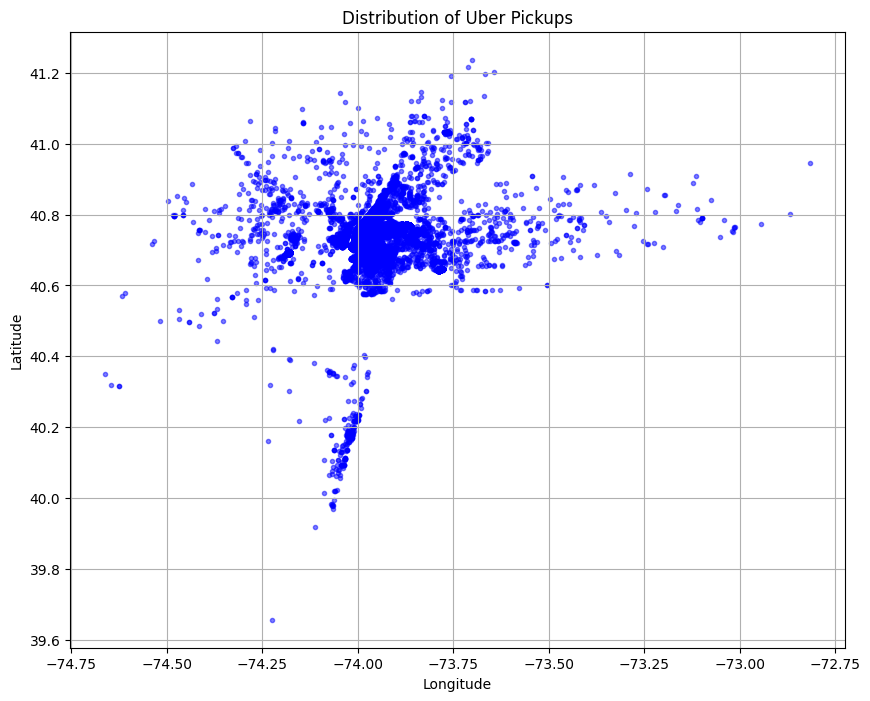

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['Lon'], df['Lat'], alpha=0.5, c='b', marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')
plt.grid(True)
plt.show()



#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

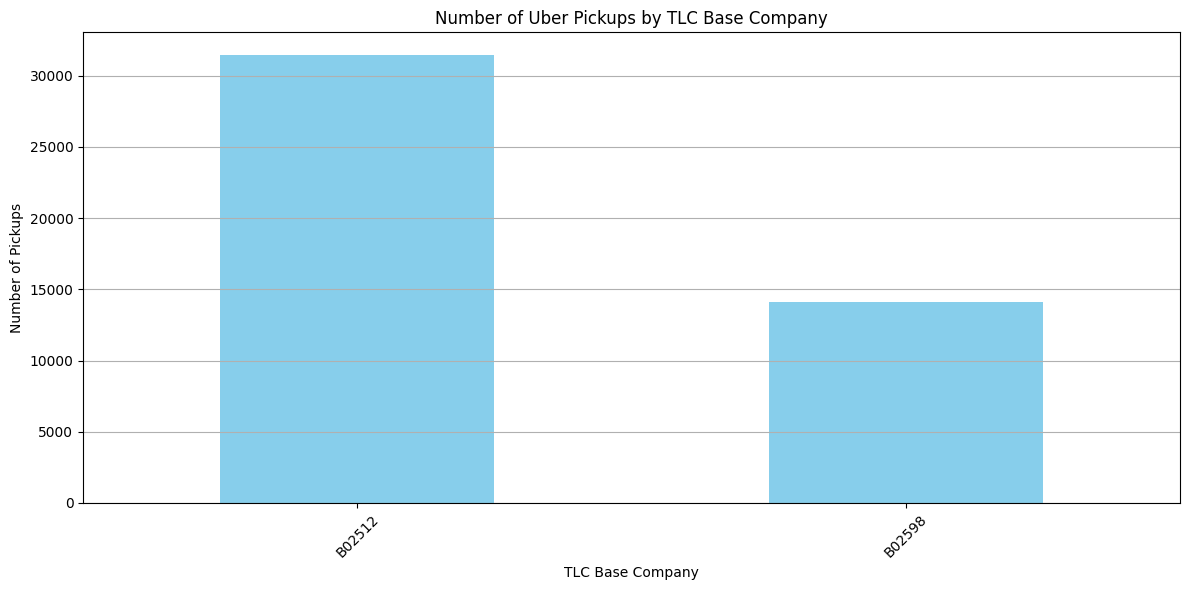

In [13]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base = df['Base'].value_counts()

# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(12, 6))
pickup_counts_by_base.plot(kind='bar', color='skyblue')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

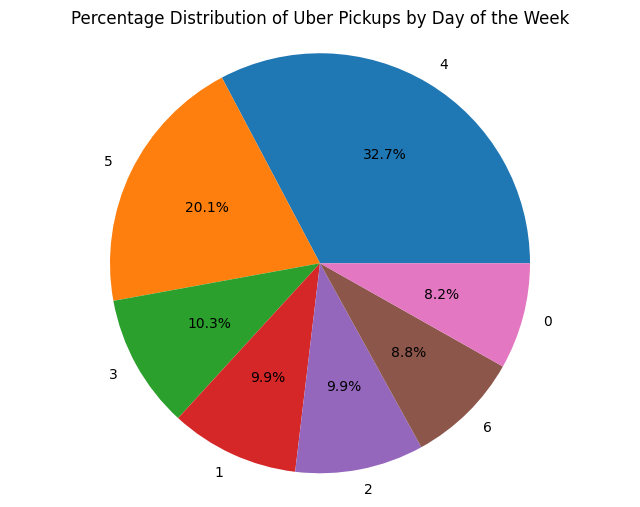

In [12]:
# Group by day of the week and count the number of pickups
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
pickup_counts_by_day = df['DayOfWeek'].value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 6))
plt.pie(pickup_counts_by_day, labels=pickup_counts_by_day.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.show()
